<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#modeling" data-toc-modified-id="modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>modeling</a></span></li></ul></div>

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src/"))

In [2]:
from load_data import LoadData
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from nklearn.lgbm_util.modeling import CvEnsembleModeling
import numpy as np
import pandas as pd
import uuid

In [3]:
uid = uuid.uuid1()

In [4]:
alg = "stack"

In [5]:
docs = "../docs/"
finfo = docs + "info/" + "ddl.csv"

data = "../data/"
data_in, data_mid, data_out = [data + fld for fld in ["in/", "mid/", "out/"]]

fin, ftest = data_in + "train_data.csv", data_in + "test_data.csv"
fmid = data_mid + "%s_%s.csv"%(alg, uid)
fout = data_out + "%s_%s.csv"%(alg, uid)

models = "../models/"
mout = models + "%s_%s.pkl"%(alg, uid)

loader = LoadData(fin, ftest, finfo)

In [6]:
X, y, test_X = loader.get_features_v1()

In [7]:
y = y.astype(float)

In [8]:
scores = {}
for p in os.listdir(data_mid)[1:]:
    scores[p] = np.loadtxt(data_mid+p)
df_score = pd.DataFrame(scores)

In [9]:
from sklearn.externals import joblib

In [10]:
scores = {}
for p in os.listdir(data_mid)[1:]:
    m = joblib.load("../models/" + p.split(".")[-2] + ".pkl")
#     print(p.split(".")[-2].split("_")[0])
    if p.split(".")[-2].split("_")[0] != "svc":
        scores[p] = m.predict_proba(test_X)[:,1]
    else:
        scores[p] = m.predict(test_X)
        
df_score_test = pd.DataFrame(scores)

In [11]:
X = pd.concat([df_score],1)

In [12]:
test_X = pd.concat([df_score_test],1)

# modeling

In [14]:
opt = CvEnsembleModeling()

In [15]:
models, best_scores = opt.opt_fit(X=X, y=y, n_trials=50)

[I 2019-04-14 15:16:34,213] Finished trial#0 resulted in value: 0.12886690836684067. Current best value is 0.12886690836684067 with parameters: {'num_leaves': 354, 'learning_rate': 0.6748430141704855, 'feature_fraction': 0.05366176188657845}.
[I 2019-04-14 15:16:34,378] Finished trial#1 resulted in value: 0.14713981070215976. Current best value is 0.12886690836684067 with parameters: {'num_leaves': 354, 'learning_rate': 0.6748430141704855, 'feature_fraction': 0.05366176188657845}.
[I 2019-04-14 15:16:34,532] Finished trial#2 resulted in value: 0.1462029678071406. Current best value is 0.12886690836684067 with parameters: {'num_leaves': 354, 'learning_rate': 0.6748430141704855, 'feature_fraction': 0.05366176188657845}.
[I 2019-04-14 15:16:34,682] Finished trial#3 resulted in value: 0.14620634202943195. Current best value is 0.12886690836684067 with parameters: {'num_leaves': 354, 'learning_rate': 0.6748430141704855, 'feature_fraction': 0.05366176188657845}.
[I 2019-04-14 15:16:34,803] F

[I 2019-04-14 15:16:38,783] Finished trial#33 resulted in value: 0.14725145776327175. Current best value is 0.07305895877851554 with parameters: {'num_leaves': 10, 'learning_rate': 0.27756047278015394, 'feature_fraction': 0.8891838803685546}.
[I 2019-04-14 15:16:38,965] Finished trial#34 resulted in value: 0.08468543713446763. Current best value is 0.07305895877851554 with parameters: {'num_leaves': 10, 'learning_rate': 0.27756047278015394, 'feature_fraction': 0.8891838803685546}.
[I 2019-04-14 15:16:39,095] Finished trial#35 resulted in value: 0.1482802978366471. Current best value is 0.07305895877851554 with parameters: {'num_leaves': 10, 'learning_rate': 0.27756047278015394, 'feature_fraction': 0.8891838803685546}.
[I 2019-04-14 15:16:39,294] Finished trial#36 resulted in value: 0.1467144602097814. Current best value is 0.07305895877851554 with parameters: {'num_leaves': 10, 'learning_rate': 0.27756047278015394, 'feature_fraction': 0.8891838803685546}.
[I 2019-04-14 15:16:39,443] Fi

[I 2019-04-14 15:16:44,093] Finished trial#16 resulted in value: 0.1499735259030227. Current best value is 0.09473805732341822 with parameters: {'num_leaves': 434, 'learning_rate': 0.8286819828720183, 'feature_fraction': 0.7716074968387491}.
[I 2019-04-14 15:16:44,268] Finished trial#17 resulted in value: 0.09679344784463928. Current best value is 0.09473805732341822 with parameters: {'num_leaves': 434, 'learning_rate': 0.8286819828720183, 'feature_fraction': 0.7716074968387491}.
[I 2019-04-14 15:16:44,429] Finished trial#18 resulted in value: 0.09777419054480663. Current best value is 0.09473805732341822 with parameters: {'num_leaves': 434, 'learning_rate': 0.8286819828720183, 'feature_fraction': 0.7716074968387491}.
[I 2019-04-14 15:16:44,588] Finished trial#19 resulted in value: 0.09567055701222094. Current best value is 0.09473805732341822 with parameters: {'num_leaves': 434, 'learning_rate': 0.8286819828720183, 'feature_fraction': 0.7716074968387491}.
[I 2019-04-14 15:16:44,742] F

[I 2019-04-14 15:16:48,538] Finished trial#49 resulted in value: 0.15145446723336664. Current best value is 0.08481925448069372 with parameters: {'num_leaves': 57, 'learning_rate': 0.33323248503927433, 'feature_fraction': 0.9024339369939143}.
[I 2019-04-14 15:16:48,746] Finished trial#0 resulted in value: 0.15284805496288567. Current best value is 0.15284805496288567 with parameters: {'num_leaves': 275, 'learning_rate': 0.0018771161708983485, 'feature_fraction': 0.4339012250508767}.
[I 2019-04-14 15:16:48,885] Finished trial#1 resulted in value: 0.09313134666097822. Current best value is 0.09313134666097822 with parameters: {'num_leaves': 118, 'learning_rate': 0.0006859385743382462, 'feature_fraction': 0.966508038134151}.
[I 2019-04-14 15:16:49,058] Finished trial#2 resulted in value: 0.15311994304545218. Current best value is 0.09313134666097822 with parameters: {'num_leaves': 118, 'learning_rate': 0.0006859385743382462, 'feature_fraction': 0.966508038134151}.
[I 2019-04-14 15:16:49,2

[I 2019-04-14 15:16:53,285] Finished trial#32 resulted in value: 0.09456523616542312. Current best value is 0.08992884453620098 with parameters: {'num_leaves': 76, 'learning_rate': 0.07085441193791177, 'feature_fraction': 0.7193447046091138}.
[I 2019-04-14 15:16:53,404] Finished trial#33 resulted in value: 0.08638010450270095. Current best value is 0.08638010450270095 with parameters: {'num_leaves': 97, 'learning_rate': 0.3588095275831395, 'feature_fraction': 0.7219836049887209}.
[I 2019-04-14 15:16:53,626] Finished trial#34 resulted in value: 0.1483509327677055. Current best value is 0.08638010450270095 with parameters: {'num_leaves': 97, 'learning_rate': 0.3588095275831395, 'feature_fraction': 0.7219836049887209}.
[I 2019-04-14 15:16:53,758] Finished trial#35 resulted in value: 0.15150598600476184. Current best value is 0.08638010450270095 with parameters: {'num_leaves': 97, 'learning_rate': 0.3588095275831395, 'feature_fraction': 0.7219836049887209}.
[I 2019-04-14 15:16:53,931] Fini

[I 2019-04-14 15:16:58,017] Finished trial#15 resulted in value: 0.14572198644470657. Current best value is 0.08531002289259937 with parameters: {'num_leaves': 138, 'learning_rate': 0.0003085504261163053, 'feature_fraction': 0.975753869761475}.
[I 2019-04-14 15:16:58,123] Finished trial#16 resulted in value: 0.08415487078714912. Current best value is 0.08415487078714912 with parameters: {'num_leaves': 58, 'learning_rate': 0.17032174510517323, 'feature_fraction': 0.8757974767893316}.
[I 2019-04-14 15:16:58,213] Finished trial#17 resulted in value: 0.0833623353905768. Current best value is 0.0833623353905768 with parameters: {'num_leaves': 54, 'learning_rate': 0.15608338416189207, 'feature_fraction': 0.9771361520084548}.
[I 2019-04-14 15:16:58,302] Finished trial#18 resulted in value: 0.08349832906458798. Current best value is 0.0833623353905768 with parameters: {'num_leaves': 54, 'learning_rate': 0.15608338416189207, 'feature_fraction': 0.9771361520084548}.
[I 2019-04-14 15:16:58,388] F

[I 2019-04-14 15:17:02,663] Finished trial#48 resulted in value: 0.14554301082847143. Current best value is 0.07415407467819635 with parameters: {'num_leaves': 14, 'learning_rate': 0.2541624796022483, 'feature_fraction': 0.7307798622654951}.
[I 2019-04-14 15:17:02,846] Finished trial#49 resulted in value: 0.14617414059442924. Current best value is 0.07415407467819635 with parameters: {'num_leaves': 14, 'learning_rate': 0.2541624796022483, 'feature_fraction': 0.7307798622654951}.
[I 2019-04-14 15:17:03,049] Finished trial#0 resulted in value: 0.08647386602840001. Current best value is 0.08647386602840001 with parameters: {'num_leaves': 188, 'learning_rate': 0.12230051235418211, 'feature_fraction': 0.7451554283509835}.
[I 2019-04-14 15:17:03,174] Finished trial#1 resulted in value: 0.14708428591809164. Current best value is 0.08647386602840001 with parameters: {'num_leaves': 188, 'learning_rate': 0.12230051235418211, 'feature_fraction': 0.7451554283509835}.
[I 2019-04-14 15:17:03,305] Fi

[I 2019-04-14 15:17:07,030] Finished trial#31 resulted in value: 0.14393862022676052. Current best value is 0.08132305329957612 with parameters: {'num_leaves': 15, 'learning_rate': 0.09091146965680962, 'feature_fraction': 0.7354776659275737}.
[I 2019-04-14 15:17:07,188] Finished trial#32 resulted in value: 0.14878850691007262. Current best value is 0.08132305329957612 with parameters: {'num_leaves': 15, 'learning_rate': 0.09091146965680962, 'feature_fraction': 0.7354776659275737}.
[I 2019-04-14 15:17:07,323] Finished trial#33 resulted in value: 0.11381621118113627. Current best value is 0.08132305329957612 with parameters: {'num_leaves': 15, 'learning_rate': 0.09091146965680962, 'feature_fraction': 0.7354776659275737}.
[I 2019-04-14 15:17:07,501] Finished trial#34 resulted in value: 0.09178532498224645. Current best value is 0.08132305329957612 with parameters: {'num_leaves': 15, 'learning_rate': 0.09091146965680962, 'feature_fraction': 0.7354776659275737}.
[I 2019-04-14 15:17:07,672] 

In [16]:
w = 1 - np.array(best_scores)

In [18]:
def predict(X, models, weight):
    preds = []
    X = np.array(X)
    for model, w in zip(models, weight):
        preds.append(model.predict(X)*w)
    preds = np.array(preds)
    return preds.sum(0)/sum(weight)


In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
p = predict(X, models, w)

In [22]:
best_thre, max_acc = 0,0
for thre in range(100):
    b = p >= thre/100
    b = np.vectorize(int)(b)
    acc = sum(b == y)/len(y)
    if acc > max_acc:
        best_thre = thre/100
        max_acc = acc
    print(thre, acc)

0 0.222
1 0.222
2 0.222
3 0.222
4 0.32096296296296295
5 0.3844074074074074
6 0.4146666666666667
7 0.4918888888888889
8 0.578037037037037
9 0.6497407407407407
10 0.7012222222222222
11 0.7414814814814815
12 0.766962962962963
13 0.7834074074074074
14 0.7941111111111111
15 0.803074074074074
16 0.8136666666666666
17 0.8235925925925925
18 0.8357777777777777
19 0.8429629629629629
20 0.8491851851851852
21 0.8560740740740741
22 0.8624814814814815
23 0.8672962962962963
24 0.8733333333333333
25 0.877
26 0.8801481481481481
27 0.8837407407407407
28 0.8864444444444445
29 0.8892962962962963
30 0.8919259259259259
31 0.8942222222222223
32 0.8956296296296297
33 0.8965555555555556
34 0.897962962962963
35 0.8992222222222223
36 0.9
37 0.9010370370370371
38 0.9013333333333333
39 0.9021481481481481
40 0.9026296296296297
41 0.9027037037037037
42 0.9027037037037037
43 0.9035185185185185
44 0.9034444444444445
45 0.9033333333333333
46 0.9030370370370371
47 0.9037407407407407
48 0.9037407407407407
49 0.9034444444

In [35]:
best_thre

0.47

In [23]:
p = predict(test_X, models, w)

In [36]:
b = p >= 0.8
Y = np.vectorize(int)(b)

In [37]:
test_X["Y"] = Y

In [38]:
test_X["ID"] = test_X.index

In [39]:
test_X[["ID", "Y"]].to_csv(fout, index=False)

In [40]:
joblib.dump(models, mout)

['../models/stack_c153171a-5e7c-11e9-b6e4-f06e0bb794dc.pkl']

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\keisu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


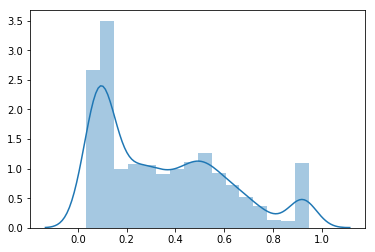

In [33]:
sns.distplot(p)

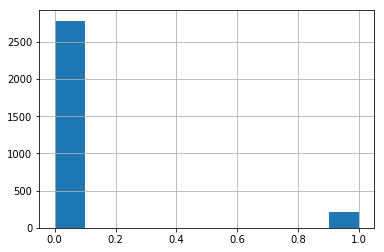

In [41]:
test_X["Y"].hist()

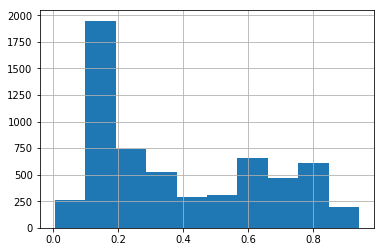

In [34]:
X[y==1][fmid].hist()

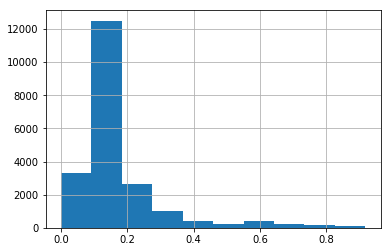

In [35]:
X[y==0][fmid].hist()